# EDA и работа с данными

## Assume to be known
- imports
- python typing
- operations with basic type:
    - str
    - int, float
    - bool
    - list, tuple
    - dict
    - set
- functions
- list comprehension
- OOP basics, terms:
    - class, object
    - method
    - parameter
- pandas
- matplotlib

## Документация
- https://docs.pola.rs/api/python/stable/reference
- https://matplotlib.org/stable
- https://seaborn.pydata.org/api.html

## Статистики

In [170]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
# загружаем датасет из файла в текущей директории
df = pl.read_csv('./titanic.csv')

# выводим числовые статистики (так же, как и в pandas)
df.describe()

statistic,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
str,f64,f64,f64,str,str,f64,f64,f64,str,f64,str,str
"""count""",891.0,891.0,891.0,"""891""","""891""",714.0,891.0,891.0,"""891""",891.0,"""204""","""889"""
"""null_count""",0.0,0.0,0.0,"""0""","""0""",177.0,0.0,0.0,"""0""",0.0,"""687""","""2"""
"""mean""",446.0,0.383838,2.308642,null,null,29.699118,0.523008,0.381594,null,32.204208,null,null
"""std""",257.353842,0.486592,0.836071,null,null,14.526497,1.102743,0.806057,null,49.693429,null,null
"""min""",1.0,0.0,1.0,"""Abbing, Mr. Anthony""","""female""",0.42,0.0,0.0,"""110152""",0.0,"""A10""","""C"""
"""25%""",224.0,0.0,2.0,null,null,20.0,0.0,0.0,null,7.925,null,null
"""50%""",446.0,0.0,3.0,null,null,28.0,0.0,0.0,null,14.4542,null,null
"""75%""",669.0,1.0,3.0,null,null,38.0,1.0,0.0,null,31.0,null,null
"""max""",891.0,1.0,3.0,"""van Melkebeke, Mr. Philemon""","""male""",80.0,8.0,6.0,"""WE/P 5735""",512.3292,"""T""","""S"""


#### некоторые методы pandas, которые потребуются далее

In [172]:
# получение колонки через метод класса DataFrame
df.get_column('Fare')

Fare
f64
7.25
71.2833
7.925
53.1
8.05
…
13.0
30.0
23.45


In [173]:
# или так (через индексирование по словарю)
df['Fare']

Fare
f64
7.25
71.2833
7.925
53.1
8.05
…
13.0
30.0
23.45


In [174]:
# список название колонок
df.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## Выбросы

In [175]:
# расчет квантилей по колонке
df.get_column('Fare').quantile(0.1)

7.55

In [176]:
df.get_column('Fare').quantile(0.5)

14.4542

In [177]:
# посчитаем все 3 квантиля
fare = df.get_column('Fare')
Q1 = fare.quantile(0.25)
Q2 = fare.quantile(0.5)
Q3 = fare.quantile(0.25)

print(Q1, Q2, Q3)

7.925 14.4542 7.925


In [178]:
# или более компактно (НО и более сложно!)
Q1, Q2, Q3 = (fare.quantile(q) for q in [0.25, 0.5, 0.75])
print(Q1, Q2, Q3)

7.925 14.4542 31.0


In [179]:
# считаем interquartile range для поиска выбросов
IQR = Q3 - Q1
print(IQR)

23.075


In [180]:
# ищем "индексы" для выбросов
k = 1.5
left_extreme = Q1 - k*IQR
right_extreme = Q3 + k*IQR
print(left_extreme, right_extreme)

-26.687499999999996 65.6125


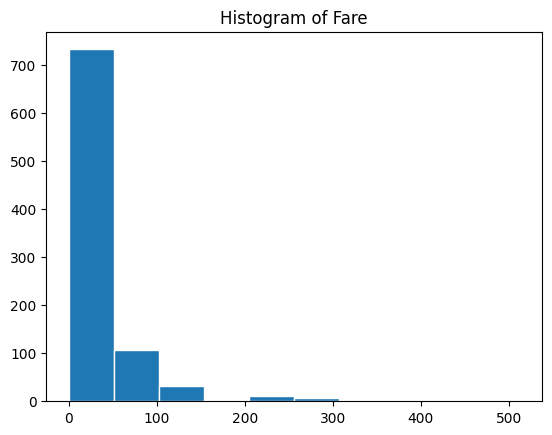

In [181]:
# построим гистограмму, чтобы визуально увидеть эти выбросы
plt.hist(fare, edgecolor='white')
plt.title('Histogram of Fare')
plt.show()

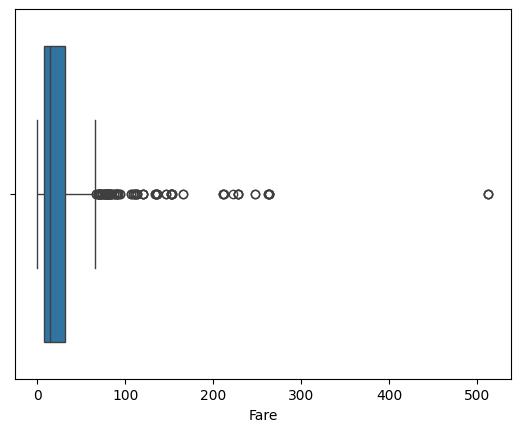

In [182]:
# и boxplot
sns.boxplot(x=fare)
plt.show()

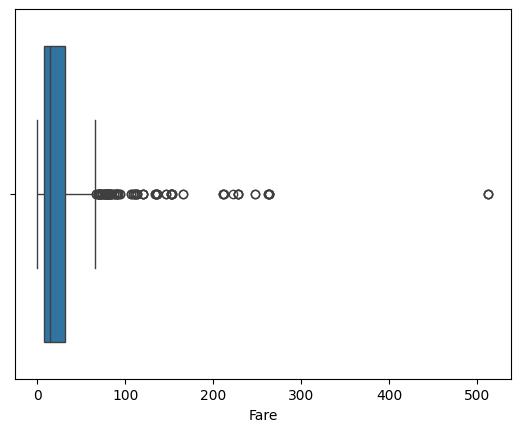

In [183]:
# можем поиграться с параметром whis для визуализации поиска выбросов с разными k
# (см. документацию)
sns.boxplot(x=fare, whis=k)
plt.show()

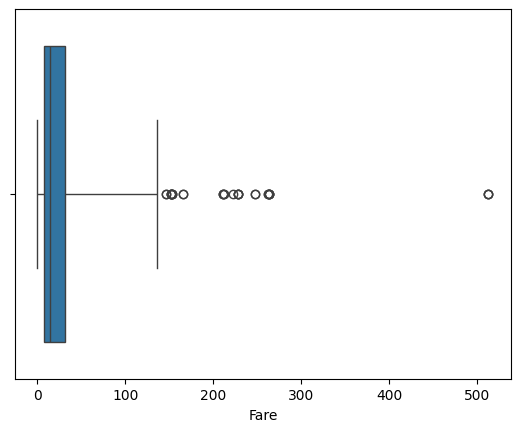

In [184]:
sns.boxplot(x=fare, whis=5)
plt.show()

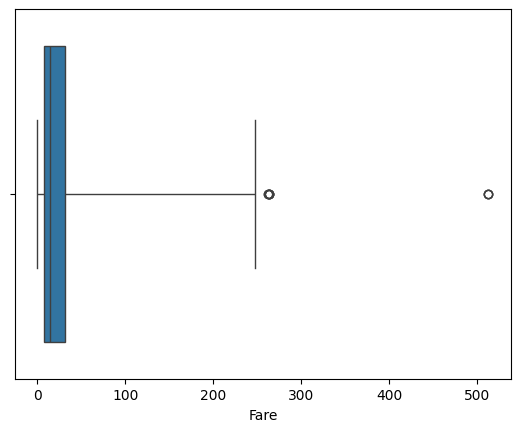

In [185]:
sns.boxplot(x=fare, whis=(1, 99))
plt.show()

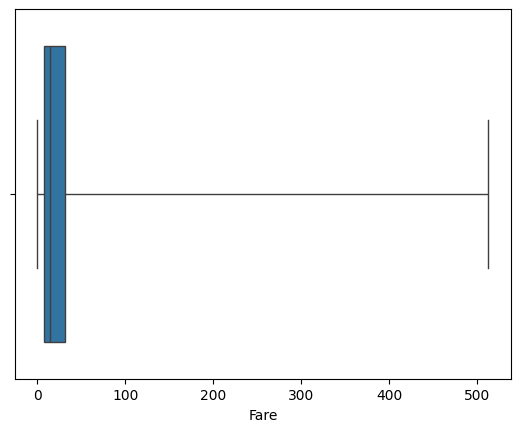

In [186]:
sns.boxplot(x=fare, whis=(0, 100))
plt.show()

## Выявление пропусков

In [187]:
# метод подсчета количества пропусков
# важно: метод учитывает лишь те пропуски, которые представлены типом данных n/a
# но если, к примеру, в данных встречается пустая строка, то она не будет учтена в этом числе
df.null_count()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,177,0,0,0,0,687,2


In [188]:
len(df) # всего наблюдений

891

In [189]:
# null_count() для колонки
age = df.get_column('Age')
age.null_count()

177

In [190]:
# процент пропусков в данных
null_percent = age.null_count() / len(df) * 100
print(round(null_percent, 2), '%')

19.87 %


In [191]:
# % пропуска в данных во всех колонках
[
    df.get_column(column).null_count() / len(df) * 100
    for column in df.columns
]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19.865319865319865,
 0.0,
 0.0,
 0.0,
 0.0,
 77.10437710437711,
 0.22446689113355783]

In [192]:
# тот же % в виде типа данных DataFrame
df.null_count().select(
    (pl.all() / len(df) * 100).round(2).name.suffix(" null %")
)

PassengerId null %,Survived null %,Pclass null %,Name null %,Sex null %,Age null %,SibSp null %,Parch null %,Ticket null %,Fare null %,Cabin null %,Embarked null %
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.0,77.1,0.22


<Axes: >

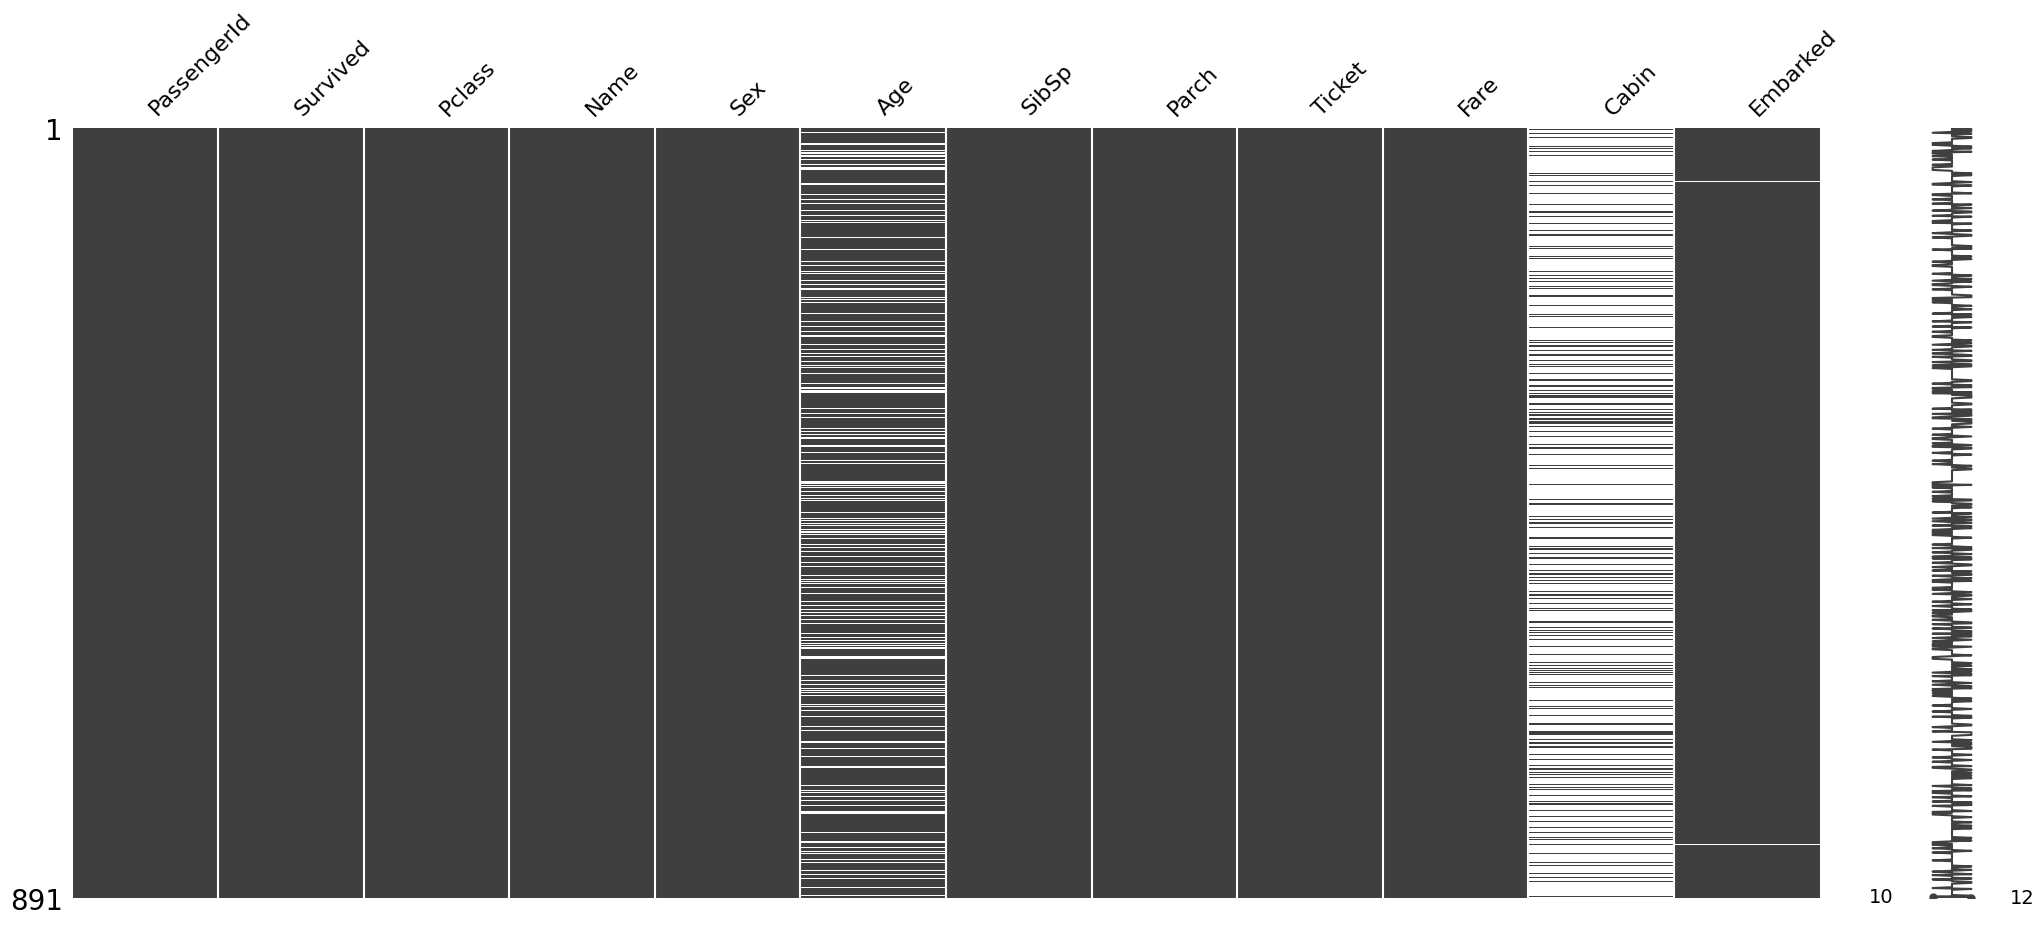

In [193]:
# красивая визуализация пропусков с помощью новой библиотеки
# обращаем внимание, что она работает с типом данных DataFrame из библиотеки pandas
import missingno as msno

msno.matrix(df.to_pandas())

## Корреляции пропусков

In [194]:
cols = ['Age', 'Cabin', 'Embarked']
null_df = df.select(
    pl.col(cols).is_null()
)
null_df.head()

Age,Cabin,Embarked
bool,bool,bool
false,true,false
false,false,false
false,true,false
false,false,false
false,true,false


In [195]:
null_df.corr()

Age,Cabin,Embarked
f64,f64,f64
1.0,0.144111,-0.023616
0.144111,1.0,-0.087042
-0.023616,-0.087042,1.0


<Axes: >

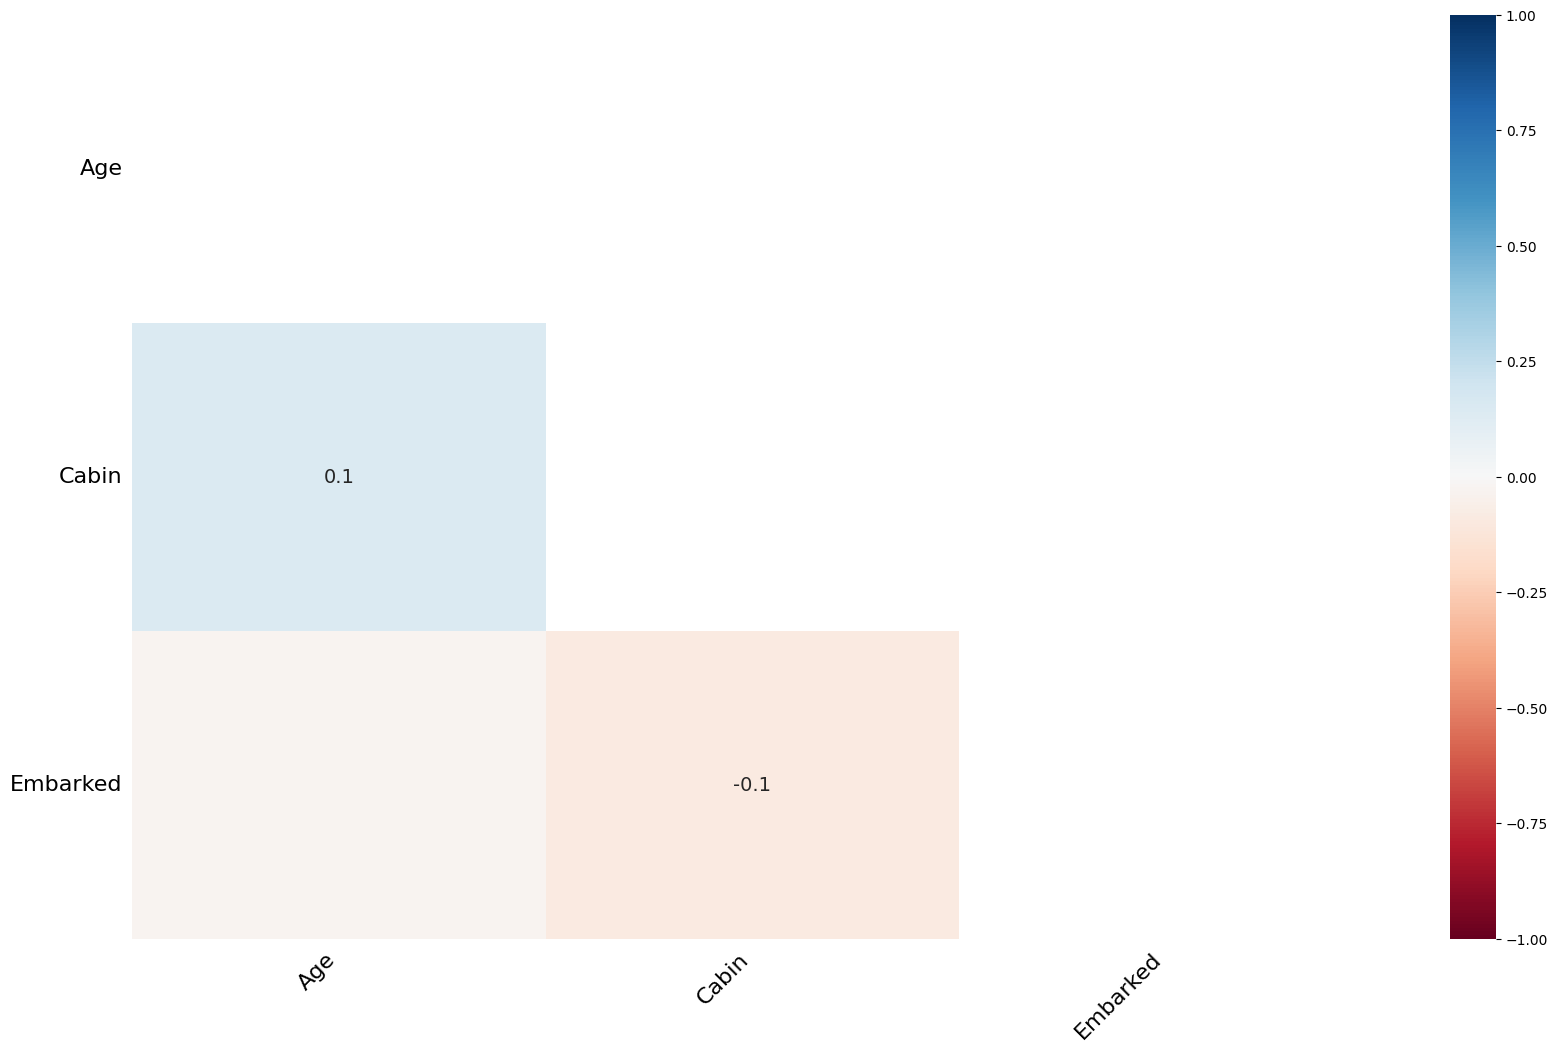

In [196]:
msno.heatmap(df.to_pandas())

## Удаление пропусков

### Удаление строк

In [197]:
df_without_misses_embarked = df.filter(pl.col('Embarked').is_not_null())
df_without_misses_embarked.describe()

statistic,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
str,f64,f64,f64,str,str,f64,f64,f64,str,f64,str,str
"""count""",889.0,889.0,889.0,"""889""","""889""",712.0,889.0,889.0,"""889""",889.0,"""202""","""889"""
"""null_count""",0.0,0.0,0.0,"""0""","""0""",177.0,0.0,0.0,"""0""",0.0,"""687""","""0"""
"""mean""",446.0,0.382452,2.311586,null,null,29.642093,0.524184,0.382452,null,32.096681,null,null
"""std""",256.998173,0.48626,0.8347,null,null,14.492933,1.103705,0.806761,null,49.697504,null,null
"""min""",1.0,0.0,1.0,"""Abbing, Mr. Anthony""","""female""",0.42,0.0,0.0,"""110152""",0.0,"""A10""","""C"""
"""25%""",224.0,0.0,2.0,null,null,20.0,0.0,0.0,null,7.8958,null,null
"""50%""",446.0,0.0,3.0,null,null,28.0,0.0,0.0,null,14.4542,null,null
"""75%""",668.0,1.0,3.0,null,null,38.0,1.0,0.0,null,31.0,null,null
"""max""",891.0,1.0,3.0,"""van Melkebeke, Mr. Philemon""","""male""",80.0,8.0,6.0,"""WE/P 5735""",512.3292,"""T""","""S"""


### Удаление столбцов

In [198]:
df_without_cabin = df_without_misses_embarked.drop(['Cabin'])
df_without_cabin.describe()

statistic,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
str,f64,f64,f64,str,str,f64,f64,f64,str,f64,str
"""count""",889.0,889.0,889.0,"""889""","""889""",712.0,889.0,889.0,"""889""",889.0,"""889"""
"""null_count""",0.0,0.0,0.0,"""0""","""0""",177.0,0.0,0.0,"""0""",0.0,"""0"""
"""mean""",446.0,0.382452,2.311586,null,null,29.642093,0.524184,0.382452,null,32.096681,null
"""std""",256.998173,0.48626,0.8347,null,null,14.492933,1.103705,0.806761,null,49.697504,null
"""min""",1.0,0.0,1.0,"""Abbing, Mr. Anthony""","""female""",0.42,0.0,0.0,"""110152""",0.0,"""C"""
"""25%""",224.0,0.0,2.0,null,null,20.0,0.0,0.0,null,7.8958,null
"""50%""",446.0,0.0,3.0,null,null,28.0,0.0,0.0,null,14.4542,null
"""75%""",668.0,1.0,3.0,null,null,38.0,1.0,0.0,null,31.0,null
"""max""",891.0,1.0,3.0,"""van Melkebeke, Mr. Philemon""","""male""",80.0,8.0,6.0,"""WE/P 5735""",512.3292,"""S"""


## Заполнение пропусков

Подготовка данных

In [199]:
# подготовим датасет, сделав небольшие преобразования
cols = ['Name', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked']
df = df.select(pl.col(cols))

# закодируем столбец Sex с помощью числовых значений
map_dict = {'male' : 0, 'female' : 1}
df = df.with_columns(
    pl.col("Sex").replace(map_dict).alias("sec encoded").cast(int)
)

# посмотрим на результат
df.head()

Name,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,sec encoded
str,i64,str,i64,i64,f64,f64,str,i64
"""Braund, Mr. Owen Harris""",3,"""male""",1,0,7.25,22.0,"""S""",0
"""Cumings, Mrs. John Bradley (Fl…",1,"""female""",1,0,71.2833,38.0,"""C""",1
"""Heikkinen, Miss. Laina""",3,"""female""",0,0,7.925,26.0,"""S""",1
"""Futrelle, Mrs. Jacques Heath (…",1,"""female""",1,0,53.1,35.0,"""S""",1
"""Allen, Mr. William Henry""",3,"""male""",0,0,8.05,35.0,"""S""",0


### Одномерные методы

#### Заполнение константой

Количественные данные

In [200]:
# заполним пропуски в столбце Age нулями
fillna_const = df.with_columns(
    pl.col('Age').fill_null(0)
)

In [201]:
# посмотрим, как такое заполнение отразилось на данных
df['Age'].median(), fillna_const['Age'].median()

(28.0, 24.0)

Категориальные данные

In [202]:
# найдем пассажиров с неизвестным портом посадки
# для этого создадим маску по столбцу Embarked и применим ее к исходным данным
missing_embarked = df.filter(pl.col('Embarked').is_null())

# Показать результат
missing_embarked

Name,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,sec encoded
str,i64,str,i64,i64,f64,f64,str,i64
"""Icard, Miss. Amelie""",1,"""female""",0,0,80.0,38.0,null,1
"""Stone, Mrs. George Nelson (Mar…",1,"""female""",0,0,80.0,62.0,null,1


In [203]:
# какие в принципе есть значения переменной Embarked
df['Embarked'].value_counts()

Embarked,count
str,u32
"""Q""",77
"""C""",168
null,2
"""S""",644


In [204]:
# в википедии есть информация по пассажирам титаника (https://en.wikipedia.org/wiki/Passengers_of_the_Titanic)
# там можно найти, что обе эти пассажирки заходили на борт с Southampton (т.е. S)
# заполняем для них эти значения
df = df.with_columns(
    pl.col('Embarked').fill_null('S')
)
df.head()

Name,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,sec encoded
str,i64,str,i64,i64,f64,f64,str,i64
"""Braund, Mr. Owen Harris""",3,"""male""",1,0,7.25,22.0,"""S""",0
"""Cumings, Mrs. John Bradley (Fl…",1,"""female""",1,0,71.2833,38.0,"""C""",1
"""Heikkinen, Miss. Laina""",3,"""female""",0,0,7.925,26.0,"""S""",1
"""Futrelle, Mrs. Jacques Heath (…",1,"""female""",1,0,53.1,35.0,"""S""",1
"""Allen, Mr. William Henry""",3,"""male""",0,0,8.05,35.0,"""S""",0


In [205]:
# смотрим новые уникальные значения
df['Embarked'].value_counts()

Embarked,count
str,u32
"""C""",168
"""S""",646
"""Q""",77


#### Заполнение средним арифметическим или медианой

In [206]:
# заполним пропуски в столбце Age медианным значением возраста,
# можно заполнить и средним арифметическим через метод .mean()
fillna_median = df.with_columns(
    pl.col('Age').fill_null(pl.col('Age').median())
)

Text(0.5, 1.0, 'Распределение Age до заполнения медианой')

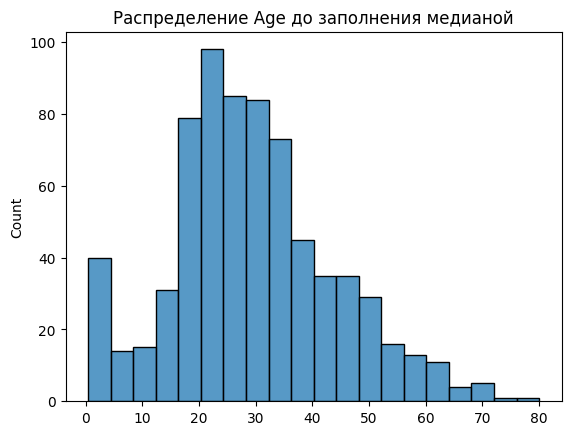

In [207]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(df['Age'], bins = 20)
plt.title('Распределение Age до заполнения медианой')

Text(0.5, 1.0, 'Распределение Age до заполнения медианой')

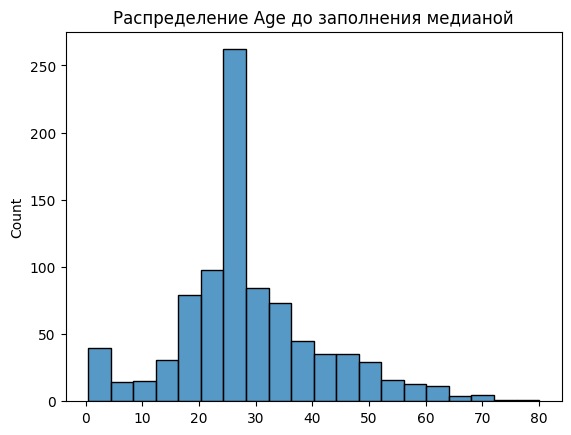

In [208]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(fillna_median['Age'], bins = 20)
plt.title('Распределение Age до заполнения медианой')

#### Заполнение внутригрупповым значением

In [209]:
# выберем столбец 'Age' и попробуем для начала посчитать значения в группировках
median_by_group = df.filter(
    pl.col('Age').is_not_null()
).group_by(
    ['Sex', 'Pclass']
).agg(
    pl.col('Age').median().alias('median_age')
)

median_by_group

Sex,Pclass,median_age
str,i64,f64
"""male""",2,30.0
"""male""",3,25.0
"""female""",2,28.0
"""male""",1,40.0
"""female""",1,35.0
"""female""",3,21.5


In [210]:
# один из способов заполнить значения по группам (метод over() в Expression)
median_imputer_bins = df.with_columns(
    pl.col('Age').fill_null(
        pl.col('Age').median().over(['Sex', 'Pclass'])
    ).alias('Age')
)

In [211]:
# проверим пропуски в столбце Age
median_imputer_bins['Age'].null_count()

0

Text(0.5, 1.0, 'Распределение Age после заполнения внутригрупповой медианой')

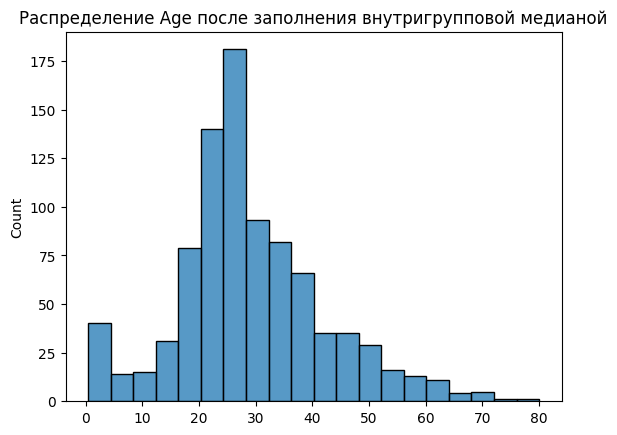

In [212]:
sns.histplot(median_imputer_bins['Age'], bins = 20)
plt.title('Распределение Age после заполнения внутригрупповой медианой')

## Визуализация данных
(не успели на семинаре, поэтому здесь просто приведены комплексные примеры визуализации данных для отчетов для самостоятельного изучения)

In [213]:
df = pl.read_csv('./titanic.csv')
df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


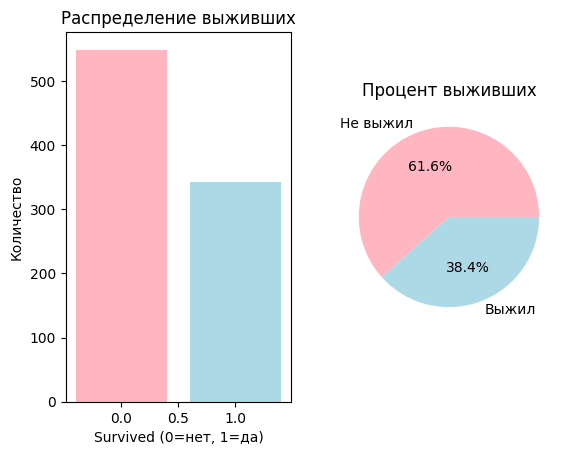

In [214]:
# Считаем количества выживших
survival_stats = df['Survived'].value_counts(sort=True)

# Визуализация на 2 графиках рядом (1 строка, 2 колонки)
fig, axes = plt.subplots(1, 2)

# Столбчатая диаграмма
axes[0].bar(survival_stats['Survived'],
            survival_stats['count'],
            color=['lightpink', 'lightblue'])
axes[0].set_title('Распределение выживших')
axes[0].set_xlabel('Survived (0=нет, 1=да)')
axes[0].set_ylabel('Количество')

# Круговая диаграмма
axes[1].pie(survival_stats['count'],
            labels=['Не выжил', 'Выжил'],
            autopct='%1.1f%%',
            colors=['lightpink', 'lightblue'])
axes[1].set_title('Процент выживших')

plt.show()

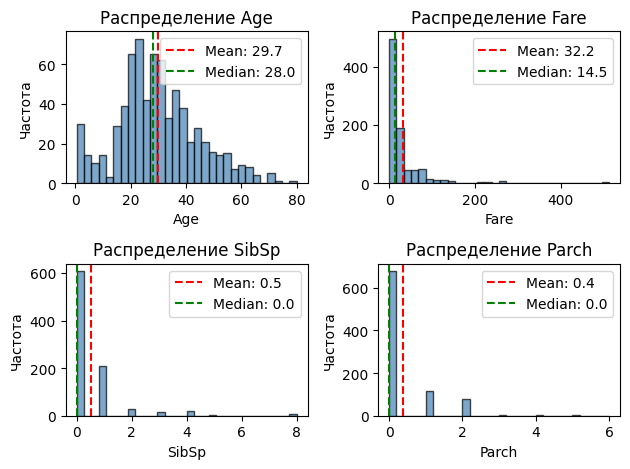

In [215]:
# находим числовые колонки
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(2, 2)
axes = axes.flatten() # в один список (не матрица 2x2)

for i, col in enumerate(numeric_cols):
    data = df[col].drop_nulls().to_numpy()

    # Гистограмма
    axes[i].hist(data, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

    # Добавляем статистику
    mean_val = np.mean(data)
    median_val = np.median(data)
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

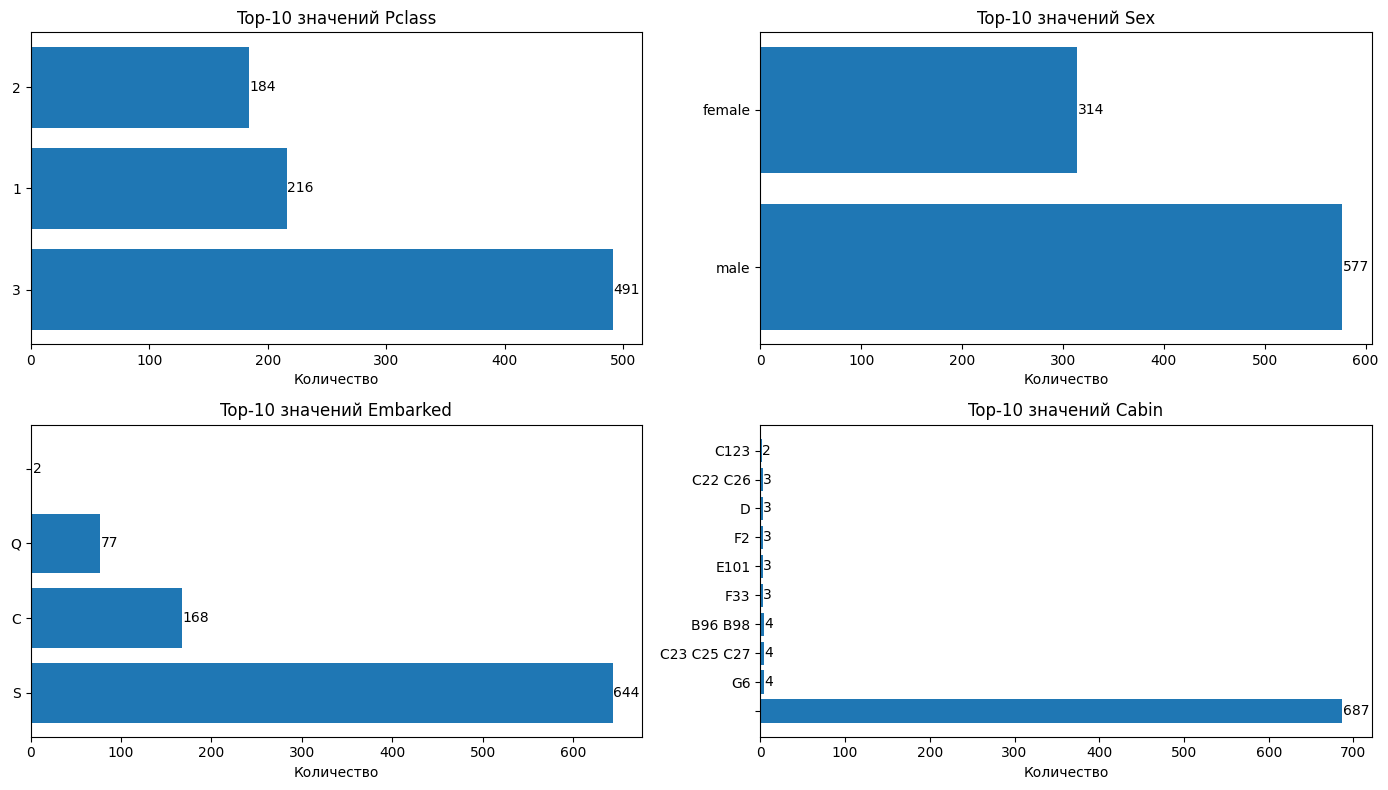

In [216]:
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Cabin']

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if col in df.columns:
        # Получаем топ-10 значений
        top_values = df[col].value_counts(sort=True).head(10)

        # Создаем barplot
        bars = axes[i].barh(
            range(len(top_values)),
            top_values['count']
        )
        axes[i].set_yticks(range(len(top_values)))
        axes[i].set_yticklabels(top_values[col])
        axes[i].set_title(f'Top-10 значений {col}')
        axes[i].set_xlabel('Количество')

        # Добавляем значения на столбцы
        for bar, count in zip(bars, top_values['count']):
            axes[i].text(
                bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                f'{count}', va='center'
            )

plt.tight_layout()
plt.show()

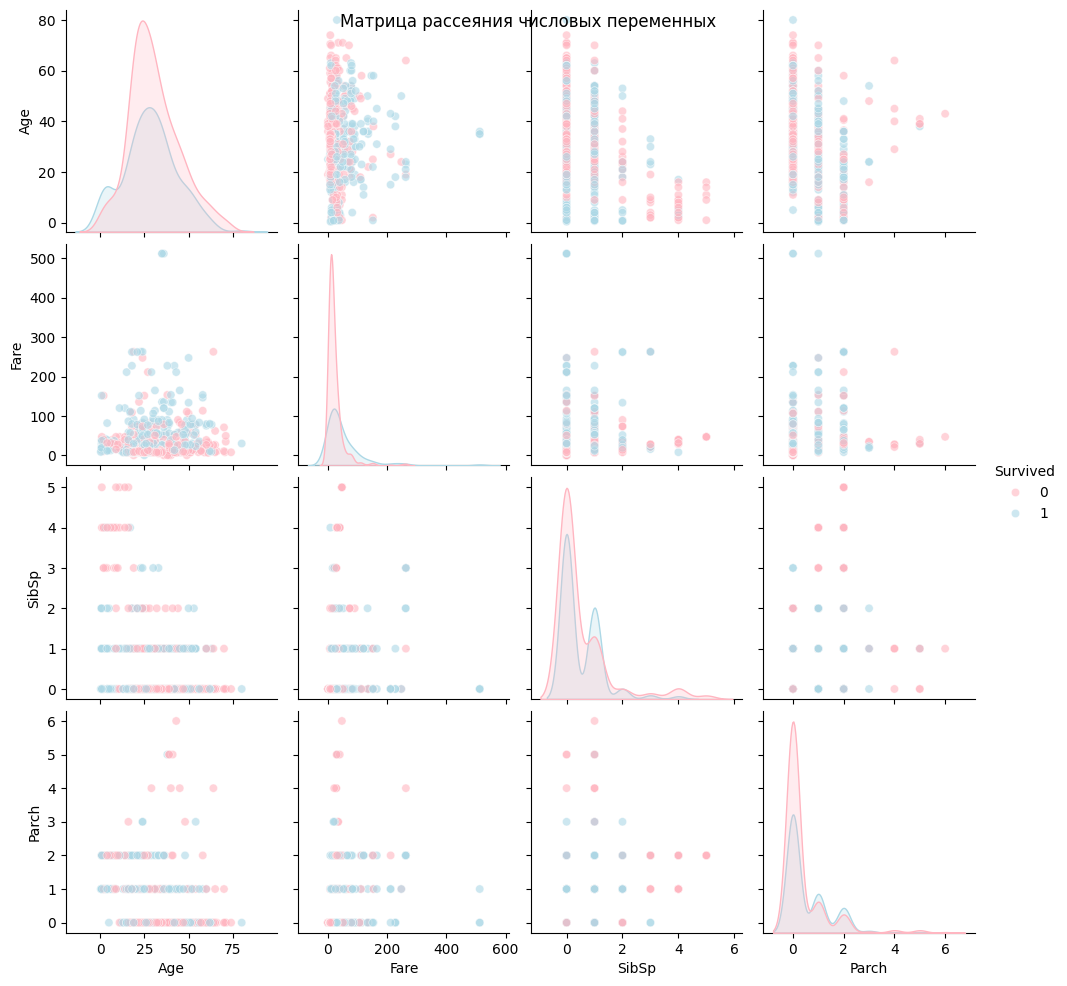

In [217]:
# простые готовые визуализации sns (требуется тип DataFrame pandas!)
numeric_df = df.select(['Age', 'Fare', 'SibSp', 'Parch', 'Survived']).drop_nulls()

# Матрица рассеяния с выделением выживших
sns.pairplot(
    numeric_df.to_pandas(), hue='Survived',
    palette={0: 'lightpink', 1: 'lightblue'},
    diag_kind='kde', plot_kws={'alpha': 0.6}
)

plt.suptitle('Матрица рассеяния числовых переменных')
plt.show()

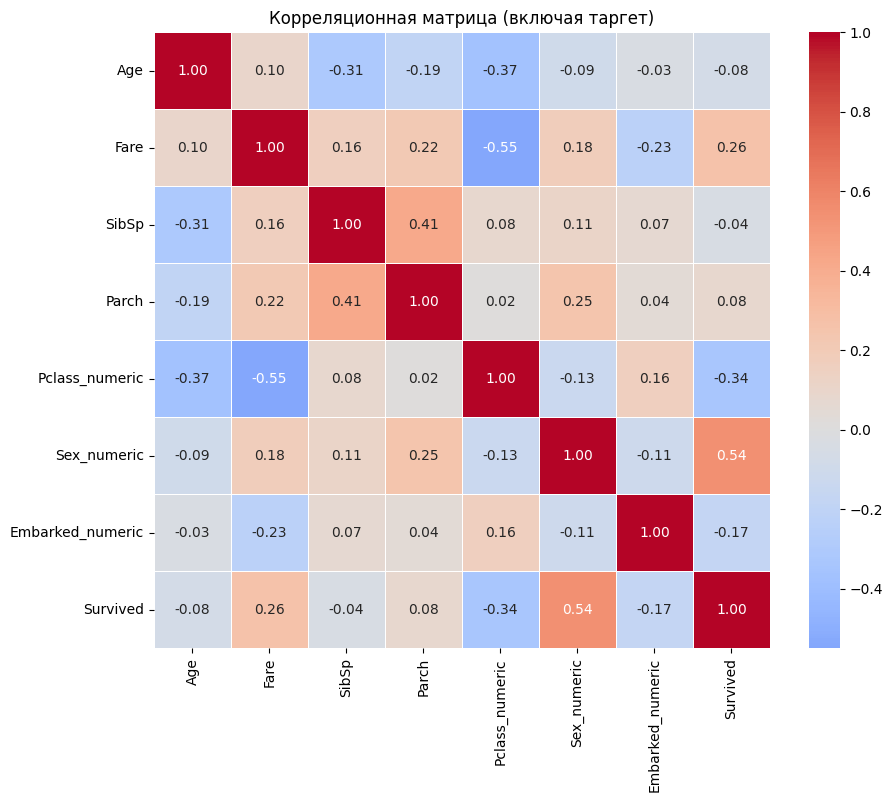

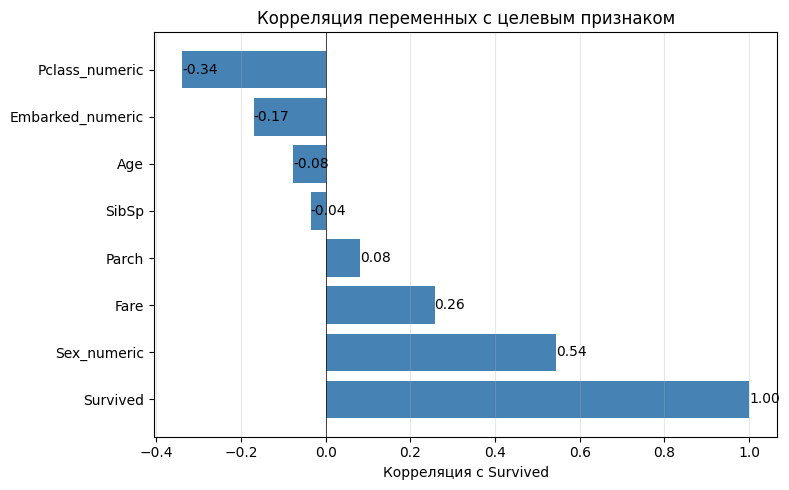

In [218]:
# немного подготовим df
df_corr = df.with_columns([
    pl.col('Sex').replace({'male': 0, 'female': 1}).alias('Sex_numeric'),
    pl.col('Embarked').replace({'C': 0, 'Q': 1, 'S': 2}).alias('Embarked_numeric'),
    pl.col('Pclass').alias('Pclass_numeric')
])

# выбираем числовые колонки для корреляций
correlation_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass_numeric',
                    'Sex_numeric', 'Embarked_numeric', 'Survived']

# считаем корреляционную матрицу
corr_matrix = df_corr.select(correlation_cols).to_pandas().corr()

# визуализируем heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Корреляционная матрица (включая таргет)')
plt.show()

# Отдельно визуализируем корреляции с таргетом через barplot
target_corr = corr_matrix['Survived'].sort_values(ascending=False)

plt.figure(figsize=(8, 5))

bars = plt.barh(target_corr.index, target_corr.values, color='steelblue')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

plt.xlabel('Корреляция с Survived')
plt.title('Корреляция переменных с целевым признаком')
plt.grid(axis='x', alpha=0.3)

# Добавляем значения для barplot
for bar, value in zip(bars, target_corr.values):
    plt.text(bar.get_width(),
             bar.get_y() + bar.get_height()/2, # для красоты отображения значений
             f'{value:.2f}',
             va='center',
             color='black')

plt.tight_layout()
plt.show()